# Loan Prediction using machine learning

La société Dream Housing Finance propose tous types de prêts immobiliers. Elle est présente dans toutes les zones, qu'elles soient urbaines, semi-urbaines ou rurales. Les clients font d'abord une demande de prêt immobilier, après quoi la société valide l'éligibilité du client pour le prêt. La société souhaite automatiser le processus d'éligibilité au prêt en temps réel en fonction des détails fournis par le client lors de la soumission du formulaire de demande en ligne. Ces détails incluent le genre, l'état matrimonial, l'éducation, le nombre de personnes à charge, le revenu, le montant du prêt, l'historique de crédit et d'autres informations. Pour automatiser ce processus, ils ont donné pour mission d'identifier les segments de clients éligibles pour un montant de prêt, afin de pouvoir cibler spécifiquement ces clients.

Il s'agit d'une tâche de classification supervisée standard. Il s'agit d'un problème de classification où l'objectif est de prédire si un prêt sera approuvé ou non. Ci-dessous se trouvent les attributs du jeu de données avec leur description.


**Loan_ID :**	Unique Loan ID

**Gender :**	Male/ Female

**Married :**	Applicant married (Y/N)

**Dependent :s**	Number of dependents

**Education :**	Applicant Education (Graduate/ Under Graduate)

**Self_Employed:**	Self employed (Y/N)

**ApplicantIncome :**	Applicant income

**CoapplicantIncome :**	Coapplicant income

**LoanAmount :**	Loan amount in thousands

**Loan_Amount_Term :**	Term of loan in months

**Credit_History :**	credit history meets guidelines

**Property_Area :**	Urban/ Semi Urban/ Rural

**Loan_Status :**	Loan approved (Y/N)

Source de données : https://www.kaggle.com/datasets/sazid28/home-loan

# Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, learning_curve,validation_curve,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import pickle

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Creer une copier de la data 
df=data.copy()

# Data Exploration (exploratory data analysis)

In [5]:
# Struture des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# les dimensions/tailles de notre dataset
df.shape

(614, 13)

In [7]:
# liste les colonnes du dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
var_cat=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area']
var_num=['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']

print('Les variables catégoriques : ',var_cat)
print('Les variables numériques : ',var_num)

Les variables catégoriques :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
Les variables numériques :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [9]:
# détection des valeurs manquantes
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# detectons des doublons 
df.duplicated().sum()

0

In [11]:
# Remplir les valeurs manquantes (variables catégoriques) - mode
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [12]:
# Remplir les valeurs manquantes (variables numériques) - median
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

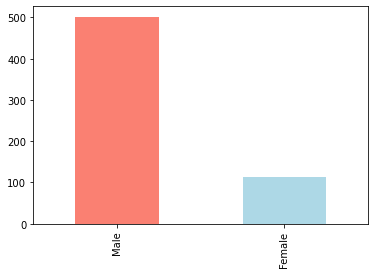

In [14]:
# Visialisation des variables catégoriques
df.Gender.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

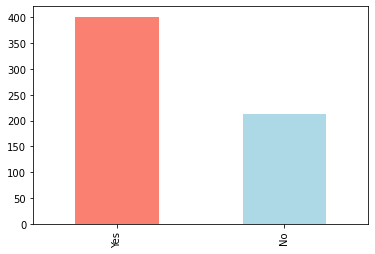

In [15]:
df.Married.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

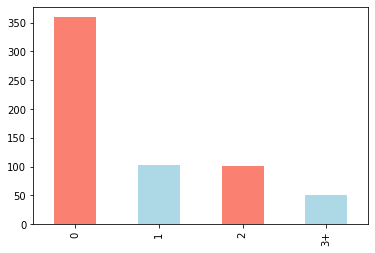

In [16]:
df.Dependents.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

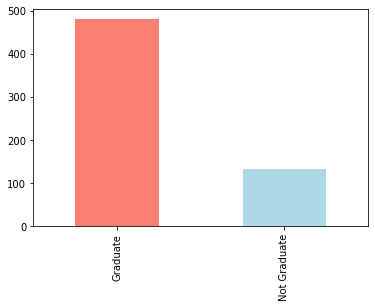

In [17]:
df.Education.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

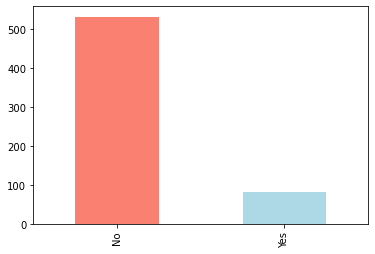

In [18]:
df.Self_Employed.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

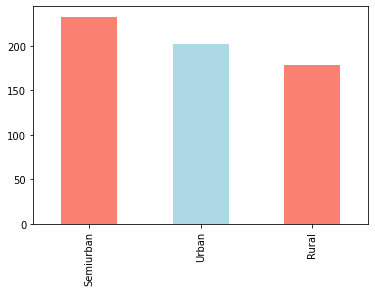

In [19]:
df.Property_Area.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [20]:
# Compare la colonne Loan_Status avec la colonne Credit_History
pd.crosstab(df.Loan_Status, df.Credit_History)

Credit_History,0.0,1.0
Loan_Status,,
N,82,110
Y,7,415


In [21]:
df[['Self_Employed', 'ApplicantIncome']].groupby(['Self_Employed'],
                                               as_index = False).mean().sort_values(by = 'Self_Employed', ascending = False)

,Self_Employed,ApplicantIncome
1,Yes,7380.817073
0,No,5098.678571


In [22]:
df[['Gender', 'Married', 'ApplicantIncome']].groupby(['Gender', 'Married'],
                                               as_index = False).mean().sort_values(by = 'Gender', 
                                                                                          ascending = False)

,Gender,Married,ApplicantIncome
2,Male,No,5251.045113
3,Male,Yes,5689.067751
0,Female,No,4503.787500
1,Female,Yes,4992.687500


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

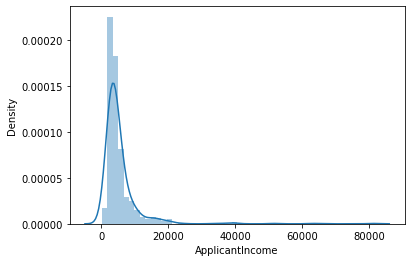

In [23]:
# Visualisation des variables numériques
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

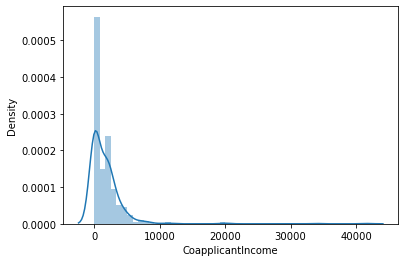

In [24]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

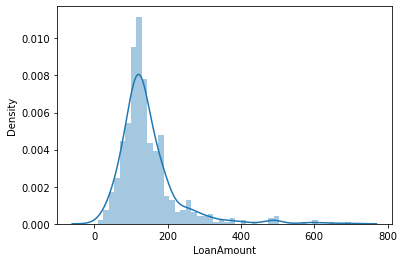

In [25]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

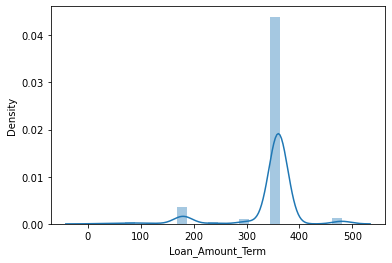

In [26]:
sns.distplot(df['Loan_Amount_Term'])

### Creation of new attributes

In [27]:
# total income
#df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
#df.head()

### Log Transformation

<AxesSubplot:xlabel='ApplicantIncome_Log', ylabel='Density'>

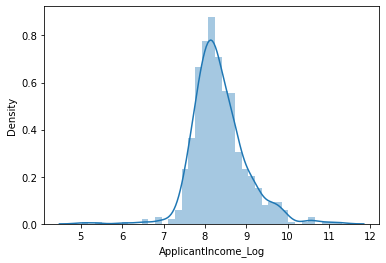

In [28]:
# Appliquer la transformation logarithmique.
df['ApplicantIncome_Log']=np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncome_Log'])

<AxesSubplot:xlabel='CoapplicantIncome_Log', ylabel='Density'>

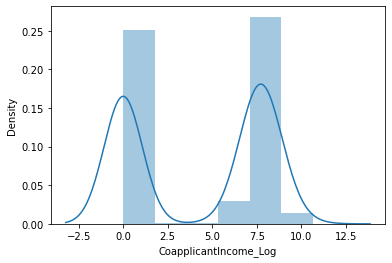

In [29]:
df['CoapplicantIncome_Log']=np.log(df['CoapplicantIncome']+1)
sns.distplot(df['CoapplicantIncome_Log'])

<AxesSubplot:xlabel='LoanAmount_Log', ylabel='Density'>

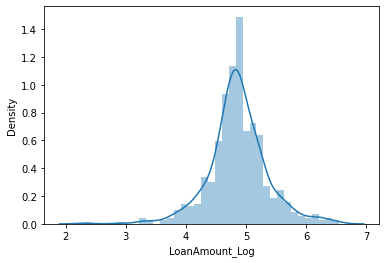

In [30]:
df['LoanAmount_Log']=np.log(df['LoanAmount']+1)
sns.distplot(df['LoanAmount_Log'])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

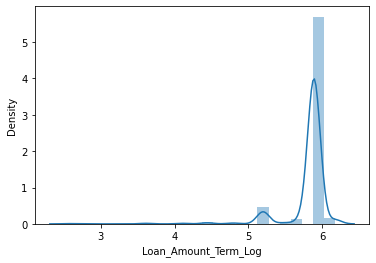

In [31]:
df['Loan_Amount_Term_Log']=np.log(df['Loan_Amount_Term']+1)
sns.distplot(df['Loan_Amount_Term_Log'])

In [32]:
#df['Total_Income_Log'] = np.log(df['Total_Income']+1)
#sns.distplot(df["Total_Income_Log"])

In [33]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", 'Loan_ID']
df = df.drop(columns=cols, axis=1)
df.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,CoapplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,0.000000,4.859812,5.888878
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,7.319202,4.859812,5.888878
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,0.000000,4.204693,5.888878
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,7.765993,4.795791,5.888878
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,0.000000,4.955827,5.888878


# Label Encoding

In [34]:
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [35]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,CoapplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log
0,1,0,0,0,0,1.0,2,1,8.674197,0.000000,4.859812,5.888878
1,1,1,1,0,0,1.0,0,0,8.430327,7.319202,4.859812,5.888878
2,1,1,0,0,1,1.0,2,1,8.006701,0.000000,4.204693,5.888878
3,1,1,0,1,0,1.0,2,1,7.857094,7.765993,4.795791,5.888878
4,1,0,0,0,0,1.0,2,1,8.699681,0.000000,4.955827,5.888878


### Coorelation Matrix

In [36]:
corr_matrix = df.corr()
corr_matrix 

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,CoapplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.009170,-0.025752,0.017987,0.084501,0.220579,0.143171,-0.054334
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.010938,0.004257,0.091478,0.021444,0.317095,0.179841,-0.068757
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,-0.040160,-0.000244,0.010118,0.115839,-0.000732,0.157109,-0.079088
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.073658,-0.065243,-0.085884,-0.181735,0.043127,-0.146672,-0.063237
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,-0.001550,-0.030860,-0.003700,0.189847,-0.092308,0.109936,-0.025993
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,1.000000,0.001963,0.540556,0.013482,0.008274,-0.018210,-0.015339
Property_Area,-0.025752,0.004257,-0.000244,-0.065243,-0.030860,0.001963,1.000000,0.032112,-0.029501,-0.055183,-0.094812,-0.082895
Loan_Status,0.017987,0.091478,0.010118,-0.085884,-0.003700,0.540556,0.032112,1.000000,0.010959,0.060593,-0.038242,-0.008168
ApplicantIncome_Log,0.084501,0.021444,0.115839,-0.181735,0.189847,0.013482,-0.029501,0.010959,1.000000,-0.368258,0.492819,-0.015315
CoapplicantIncome_Log,0.220579,0.317095,-0.000732,0.043127,-0.092308,0.008274,-0.055183,0.060593,-0.368258,1.000000,0.132697,0.013585


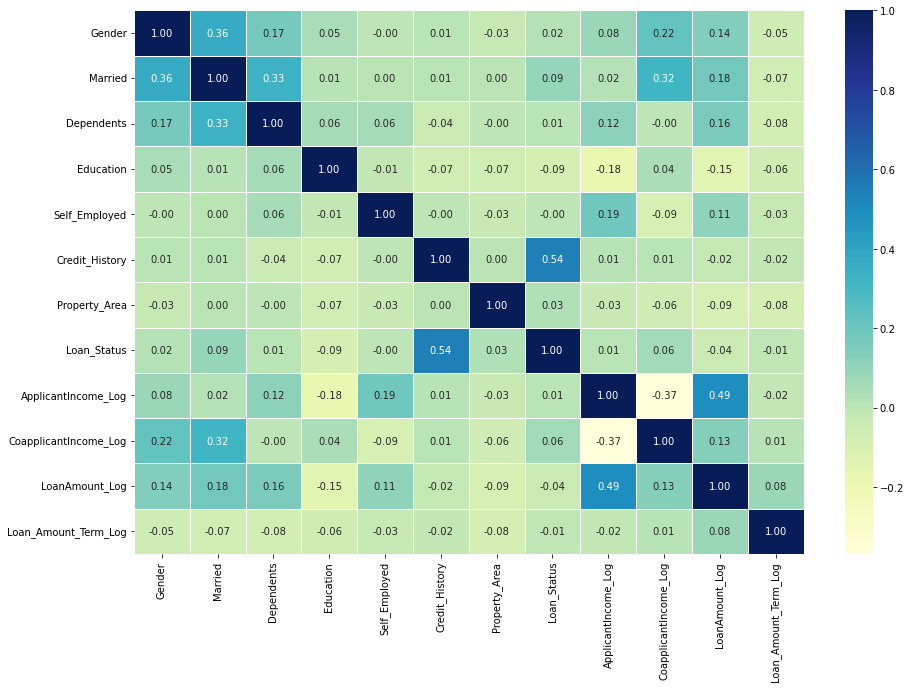

In [37]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

# Training and test split

In [38]:
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) 

## Model choices :
* **Logistic Regression - LogisticRegression()**
* **K-Nearest Neighbors - KNeighboursClassifier()**
* **RandomForest - RandomForestClassifier()**

In [39]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    
    # Make a list to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [40]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

{'KNN': 0.7317073170731707,
 'Logistic Regression': 0.7886178861788617,
 'Random Forest': 0.7642276422764228}

### Model Comparison

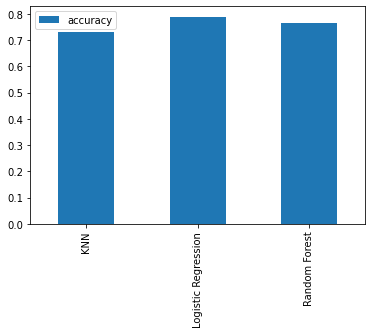

In [41]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

## Hyperparameter tuning and cross-validation

##### Tune KNeighborsClassifier (K-Nearest Neighbors)

In [42]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) 

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i) 
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    
    test_scores.append(knn.score(X_test, y_test))

In [43]:
train_scores

[1.0,
 0.879837067209776,
 0.8289205702647657,
 0.8309572301425662,
 0.8004073319755601,
 0.8187372708757638,
 0.7983706720977597,
 0.8044806517311609,
 0.7942973523421588,
 0.790224032586558,
 0.780040733197556,
 0.780040733197556,
 0.7759674134419552,
 0.780040733197556,
 0.7576374745417516,
 0.7637474541751528,
 0.7515274949083504,
 0.7596741344195519,
 0.7331975560081466,
 0.7433808553971487]

Maximum KNN score on the test data: 73.17%


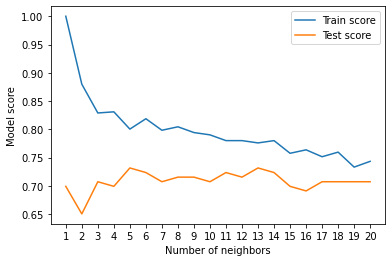

In [44]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Tuning models with with RandomizedSearchCV

In [45]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [46]:
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [47]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 545.5594781168514}

In [48]:
rs_log_reg.score(X_test, y_test)

0.7886178861788617

**Maintenant que nous avons ajusté LogisticRegression en utilisant RandomizedSearchCV, nous allons faire de même pour RandomForestClassifier**

In [49]:
# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid, cv=5,n_iter=20)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

In [50]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 14,
 'min_samples_leaf': 7,
 'max_depth': 3}

In [51]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.7886178861788617

## Tuning a model with GridSearchCV

In [52]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [53]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 545.5594781168514, 'solver': 'liblinear'}

In [54]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.7886178861788617

## Tuning a model with GridSearchCV

In [55]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [56]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 545.5594781168514, 'solver': 'liblinear'}

In [57]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.7886178861788617

## Evaluating a classification model, beyond accuracy

In [58]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [59]:
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Classification report

In [60]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [61]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 545.5594781168514, 'solver': 'liblinear'}

In [62]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=545.5594781168514,
                         solver="liblinear")

In [63]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [64]:
cv_acc = np.mean(cv_acc)
cv_acc

0.809462881514061

In [65]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.7910806823942073

In [66]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9834173669467787

In [67]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8766952317357394

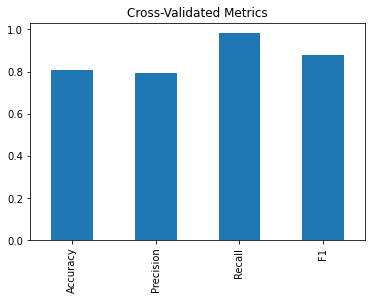

In [68]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

## Feature importance

In [69]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [70]:
# Check coef_
clf.coef_

array([[-0.3459593 ,  0.51865605,  0.14119518, -0.32618986,  0.14834018,
         3.88486728,  0.11305643,  0.40256249,  0.08778016, -0.74955191,
         0.33601637]])

In [71]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'Gender': -0.34595930154244614,
 'Married': 0.5186560512148389,
 'Dependents': 0.1411951787865006,
 'Education': -0.326189862359503,
 'Self_Employed': 0.14834017717748557,
 'Credit_History': 3.884867275501252,
 'Property_Area': 0.11305642737328027,
 'Loan_Status': 0.4025624949519075,
 'ApplicantIncome_Log': 0.08778016485619392,
 'CoapplicantIncome_Log': -0.7495519108384342,
 'LoanAmount_Log': 0.33601637260680606}

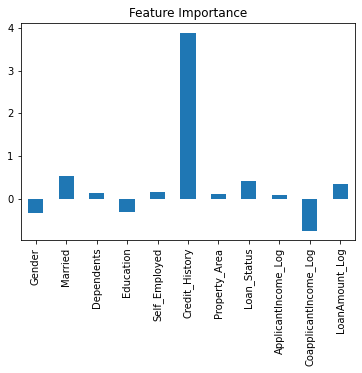

In [72]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);